In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hw-multiclass-classification/sub_baseline.csv
/kaggle/input/hw-multiclass-classification/train.csv
/kaggle/input/hw-multiclass-classification/test.csv


In [38]:
! pip install pydotplus
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import seaborn


/kaggle/input/hw-multiclass-classification/sub_baseline.csv
/kaggle/input/hw-multiclass-classification/train.csv
/kaggle/input/hw-multiclass-classification/test.csv


In [39]:
train = pd.read_csv('/kaggle/input/hw-multiclass-classification/train.csv', sep=';')
test = pd.read_csv('/kaggle/input/hw-multiclass-classification/test.csv', sep=';')
submission = pd.read_csv('/kaggle/input/hw-multiclass-classification/sub_baseline.csv')
mapper={
        'low':0,
        'medium':1,
        'high':2
       }
train['interest_level'] = train['interest_level'].apply(lambda x: mapper[x])
train['features'] = train['features'].str.replace('[\'\[\]]', '').str.split(', ')
train['features_cnt'] = train['features'].apply(len)
train['photos'] = train['photos'].str.replace('[\'\[\]]', '').str.split(', ')
train['photos_cnt'] = train['photos'].apply(len)
target = 'interest_level'
train['bedroom_price'] = train['price'] / train['bedrooms']
train['bathroom_price'] = train['price'] / train['bathrooms']
for i in range(len(train['display_address'])):
    if 'St' in str(train['display_address'][i]) or 'ST' in str(train['display_address'][i]):
        train['display_address'][i] = 0
        continue
    if 'Place' in str(train['display_address'][i]):
        train['display_address'][i] = 1
        continue 
    if 'Ave' in str(train['display_address'][i]):
        train['display_address'][i] = 2
        continue
    if 'Park' in str(train['display_address'][i]):
        train['display_address'][i] = 3
        continue
    if 'Boulevard' in str(train['display_address'][i]):
        train['display_address'][i] = 4
        continue
    train['display_address'][i] = 5
        

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == "":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/l

In [40]:
train.fillna(0)
train.replace([np.inf, -np.inf], 0, inplace=True)

In [41]:
features = ['bathrooms', 'bedrooms', 'latitude' , 'longitude', 'features_cnt', 
            'photos_cnt', 'price', 'bedroom_price', 'bathroom_price', 'display_address']

In [42]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, average_precision_score, roc_auc_score, classification_report, precision_score, recall_score, make_scorer
import joblib
import matplotlib.pyplot as plt

In [43]:
X_train, X_test, y_train, y_test = train_test_split(train[features], train[target],
                                                    test_size=0.3, random_state=42)
clfs = [MLPClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), 
        AdaBoostClassifier(), QuadraticDiscriminantAnalysis(), GaussianNB(), KNeighborsClassifier()] 

for i in range(len(clfs)):
    clf = clfs[i]
    clf.fit(X_train, y_train)
    predicts = clf.predict(X_test)
    print(clf, classification_report(y_test, predicts), sep = '\n')
 

MLPClassifier()
              precision    recall  f1-score   support

           0       0.96      0.11      0.19      8221
           1       0.25      0.97      0.39      2731
           2       0.39      0.07      0.12       893

    accuracy                           0.30     11845
   macro avg       0.53      0.38      0.23     11845
weighted avg       0.75      0.30      0.23     11845

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      8221
           1       0.35      0.35      0.35      2731
           2       0.29      0.28      0.28       893

    accuracy                           0.65     11845
   macro avg       0.48      0.47      0.47     11845
weighted avg       0.65      0.65      0.65     11845

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      8221
           1       0.45      0.32      0.37      2731
         

In [44]:
f1 = make_scorer(f1_score , average='macro')


In [45]:
def grid(a, b):
    global grsch 
    grsch = GridSearchCV(a, b, cv = 5, scoring=f1)
    grsch.fit(X_train, y_train)
    print(grsch.best_estimator_)
    print(grsch.best_params_)
def predicts_from_best(x):
    predicts = x.predict(X_test)
    print(x, classification_report(y_test, predicts), sep = '\n')

In [46]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': [10, 30, 50], 'random_state': [1]}
clf = DecisionTreeClassifier()
grid(clf, params)
best_dt = grsch.best_estimator_
predicts_from_best(best_dt)

DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=1)
{'criterion': 'entropy', 'max_depth': 30, 'random_state': 1}
DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=1)
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      8221
           1       0.36      0.36      0.36      2731
           2       0.30      0.30      0.30       893

    accuracy                           0.66     11845
   macro avg       0.48      0.48      0.48     11845
weighted avg       0.65      0.66      0.66     11845



In [47]:
params = {'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [30, 50, 70], 'random_state': [1]}
clf = AdaBoostClassifier()
grid(clf, params)
best_ab = grsch.best_estimator_
predicts_from_best(best_ab)

AdaBoostClassifier(n_estimators=70, random_state=1)
{'algorithm': 'SAMME.R', 'n_estimators': 70, 'random_state': 1}
AdaBoostClassifier(n_estimators=70, random_state=1)
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      8221
           1       0.43      0.15      0.22      2731
           2       0.45      0.15      0.23       893

    accuracy                           0.71     11845
   macro avg       0.54      0.42      0.43     11845
weighted avg       0.65      0.71      0.65     11845



In [48]:
params = {'criterion': ['gini', 'entropy'], 'n_estimators': [100], 'max_depth': range(1, 30), 
          'min_samples_split': [3], 'random_state': [1]}
clf = RandomForestClassifier()
grid(clf, params)
best_rf = grsch.best_estimator_
predicts_from_best(best_rf)

RandomForestClassifier(criterion='entropy', max_depth=29, min_samples_split=3,
                       random_state=1)
{'criterion': 'entropy', 'max_depth': 29, 'min_samples_split': 3, 'n_estimators': 100, 'random_state': 1}
RandomForestClassifier(criterion='entropy', max_depth=29, min_samples_split=3,
                       random_state=1)
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      8221
           1       0.45      0.31      0.37      2731
           2       0.45      0.30      0.36       893

    accuracy                           0.71     11845
   macro avg       0.56      0.50      0.52     11845
weighted avg       0.68      0.71      0.69     11845



In [49]:
feature_importance = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({'features':features, 'feature_importance': feature_importance})
feature_importance_df.sort_values('feature_importance', ascending=False)

,features,feature_importance
3,longitude,0.166868
2,latitude,0.166046
6,price,0.132921
7,bedroom_price,0.127186
5,photos_cnt,0.118023
8,bathroom_price,0.113956
4,features_cnt,0.106101
9,display_address,0.034361
1,bedrooms,0.024787
0,bathrooms,0.009752


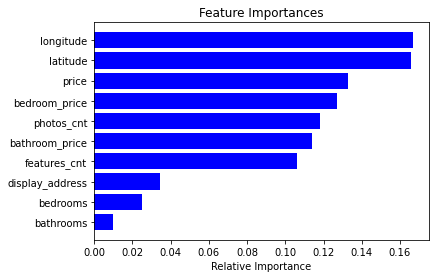

In [50]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [51]:
best_rf.fit(train[features], train[target])
test['features']=test['features'].astype(str).str.replace('[\[\]\']', '').str.split(', ')
test['features_cnt']=test['features'].apply(len)
test['photos']=test['photos'].astype(str).str.replace('[\[\]\']', '').str.split(', ')
test['photos_cnt']=test['photos'].apply(len)
test['bedroom_price'] = test['price'] / test['bedrooms']
test['bathroom_price'] = test['price'] / test['bathrooms']
for i in range(len(test['display_address'])):
    if 'St' in str(test['display_address'][i]) or 'ST' in str(test['display_address'][i]):
        test['display_address'][i] = 0
        continue
    if 'Place' in str(test['display_address'][i]):
        test['display_address'][i] = 1
        continue 
    if 'Ave' in str(test['display_address'][i]):
        test['display_address'][i] = 2
        continue
    if 'Park' in str(test['display_address'][i]):
        test['display_address'][i] = 3
        continue
    if 'Boulevard' in str(test['display_address'][i]):
        test['display_address'][i] = 4
        continue
    test['display_address'][i] = 5



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [52]:
test.fillna(0)
test.replace([np.inf, -np.inf], 0, inplace=True)

In [53]:
test[target]=best_rf.predict(test[features])
test[['listing_id', target]].to_csv('Pigalov.csv', index=None)